На примере датасета ирисов Фишера я объясняю как обучается логистичечская регрессия. При этом пользоваться функцией регрессии из библиотек я не буду. Посмотрим, как она работает, в коде.

In [ ]:
# Импортируем.
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Будем логрегать ирисы.
iris = datasets.load_iris()

In [ ]:
# Опять берем сто ирисов: по 50 каждого класса.
X = np.vstack((iris.data[:50], iris.data[50:100]))
Y = np.hstack((iris.target[:50], iris.target[50:100]))

In [ ]:
# Определим размерность нашего массива, чтобы создать
# массив для весов.
m, n = X.shape
print(m, n)

100 4


In [ ]:
# Создаем первый массив весов. Эта процедура называется
# weight initialization. w означает weight, вес.
# Пусть у нас первые веса будут просто нулями,
# но я видела, как делают, например, так: 0.1 0.2 0.3 и т.д.
# Вес отвечает за наклон прямой в линейной регрессии.
# Там мы его обозначили через k.
w = np.zeros(n)
# Вот так выглядят веса на старте. Скукота..
print(w)

[0. 0. 0. 0.]


In [ ]:
# Второй параметр линейной регрессии был b. Означал он место на оси Y,
# где ее пересекала прямая регрессии. В логистисекой регрессии
# b даже расшифровывают как bias, "предвзятость". Интересно, почему?
# Тоже начнем с нуля.
b = 0

А теперь познакомимся с сигмоидой. Считается она так: $\frac{1}{1 + e ^ {-z}}$. Чем она лучше прямой для задачи классификации: она переводит все значения в диапазон от 0 до 1. Когда у нас два класса, нам самое то и нужно. Пусть один хвост логистической регрессии будет ближе к классу 0, а другой - к классу 1. У сигмоиды высокая плотность точек на хвостах, но она становится более разреженной, приближаясь к точке 0. Предполагается, что именно в 0 наши два класса лучше всего разделимы. То есть задача логистической регрессии - найти такую точку. Причем какой массив точек в нее не пихни, она все переведет в диапазон от 0 до 1.

Вот пример: иксы у нас от -60 до 60, игреки от -6 до 6 с шагом 0.1 (это чтобы регрессия выглядела более плавно; поэкспериментируйте сами с ее формой).

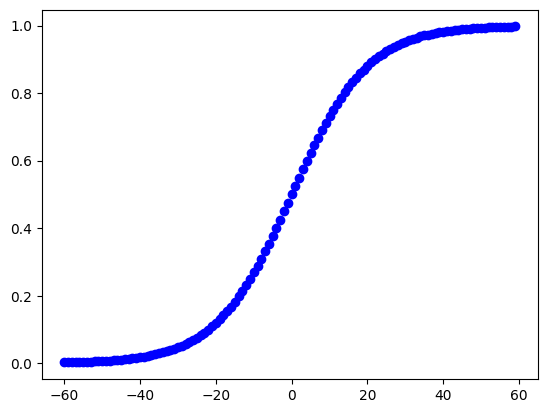

In [ ]:
plt.scatter([x for x in range(-60, 60)], [(1 / (1 + np.exp (- y/10))) for y in range(-60, 60)],  color='blue')
plt.show()

Остается вопрос: а что совать в сигмоиду вместо z? Суем весь массив иксов, помноженный на коэффициенты w: каждая строка (игрек) умножается на коэффициенты, затем берется сумма по строке. И не забываем про bias. Итоговая формлуа такая: $z = X \cdot w + b$. Почему так делается - отдельная история, связанная с вероятностями. А это вопрос не одного, а нескольких постов.

In [ ]:
print(w, b)

[0. 0. 0. 0.] 0


In [ ]:
z = X.dot(w) + b
Y_hat = 1 / (1 + np.exp( - z))
print(z, Y_hat)
# Пока ничего интересного. Где у нас точка 0, непонятно.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Дальше вечер перестает быть томным. Нам надо поменять веса так, чтобы предсказание было более точным. То есть часть наших игреков, которые все сейчас равны 0.5, начала двигаться в сторону нулей, а часть - в сторону единиц, как они и представлены в переменной Y. Для этого используется дифференцирование по матрицам в формуле z выше. Сначала получаем формулу для w -> dw, потом для b - > db. d означает delta, приращение функции в дифференциальном анализе.

In [ ]:
# dw это частные производные по k
dw = (1/m)*np.dot(X.T, (Y_hat - Y))
# db это частные производные по b
db = (1/m)*np.sum(Y_hat - Y)
print(dw, db)
# Фиксируем приращение. Осталось скорректировать наши изначальные веса.
# Но тут есть проблема. В зависимости от числовых значений,
# которыми представлены данные, за один такой шаг можно
# перешагнуть желаемое значение веса. Поэтому бывает полезно
# замедлить или убыстрить корректировку весов при помощи
# параметра learning rate. Сделаем его в нашем примере таким
# (подобран эмпирически):
learning_rate = 0.01

[-0.2325  0.1645 -0.6995 -0.27  ] 0.0


In [ ]:
w

array([0., 0., 0., 0.])

## *Градиентный спуск*

In [ ]:
# Корректируем веса и bias. Градиент, т.е. наши частные производные,
# записанные в виде вектора, показывают в сторону роста.
# Значит, будем отнимать - нам нужно минимизировать ошибку.
# learning rate помогает не перешагнуть минимум и не застрять
# в локальном минимуме.
w = w - learning_rate * dw
b = b - learning_rate * db

In [ ]:
# Снова пихаем иксы помноженные на скорректированные веса в сигмоиду.
Y_pred = 1 / (1 + np.exp( - (X.dot(w) + b)))
print(Y_pred)
# Чето поменялось. Пока всё двигается к единице.

[0.50410816 0.50419753 0.50382418 0.5041569  0.50400891 0.5047776
 0.50392617 0.50426602 0.50394804 0.50426377 0.50437514 0.50432464
 0.50407191 0.5032567  0.50395967 0.50439664 0.50407816 0.50417565
 0.50492559 0.50422715 0.50484822 0.50433577 0.50307696 0.50491747
 0.50484922 0.50460537 0.50457587 0.50434114 0.5042074  0.50434877
 0.50444801 0.50463349 0.50402691 0.50405279 0.50433127 0.50382368
 0.50416578 0.5038833  0.50373206 0.50432414 0.50394267 0.50414553
 0.50364981 0.50466974 0.50499408 0.5042069  0.50433452 0.50394092
 0.50431702 0.50413228 0.51191462 0.51128396 0.51231463 0.51012212
 0.51168125 0.51090677 0.51160179 0.50830624 0.51156331 0.50967604
 0.50887844 0.51055131 0.51025131 0.51151509 0.50923432 0.5112571
 0.5109014  0.51010437 0.5115788  0.50978825 0.51172023 0.51026518
 0.5122127  0.51142126 0.51092276 0.51124011 0.51213761 0.51254924
 0.51117489 0.50903852 0.50959645 0.50935416 0.50988971 0.51237322
 0.5107852  0.51103683 0.51184891 0.51128608 0.51006726 0.510039

In [ ]:
# Дело это не быстрое. Давайте запустим цикл из 150 шагов.
# На каждом будем повторять то, что сделали выше.
for x in range(0, 150):
    Y_hat = 1 / (1 + np.exp( - (X.dot(w) + b)))
    dw = (1/m)*np.dot(X.T, (Y_hat - Y))
    db = (1/m)*np.sum(Y_hat - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    Y_pred = 1 / (1 + np.exp( - (X.dot(w) + b)))
    print(w)
    print(Y_pred)
# Через десяток-другой шагов часть весов начинает двигаться к нулю,
# а часть продолжает двигаться к единице.
# Промотайте массивы в выводе. Обратите внимание, что точка 0
# определяется примерно посередине массива. До нее числа меньше 0.5,
# после - больше.

[ 0.00422543 -0.00351095  0.01372941  0.00532324]
[0.50736766 0.50759521 0.50686531 0.50753378 0.5071743  0.50862902
 0.5070604  0.50769296 0.5071549  0.50771756 0.50785215 0.5078249
 0.50735655 0.50579893 0.50698185 0.50782081 0.50725643 0.50750072
 0.50890054 0.50758061 0.50880167 0.50780141 0.5053791  0.50897173
 0.50885431 0.50838711 0.5083022  0.50781643 0.50756103 0.50789479
 0.50808815 0.50838149 0.50715686 0.50717583 0.50785061 0.50683899
 0.50744695 0.50693563 0.50672398 0.50779857 0.50705194 0.50757693
 0.50654846 0.50848054 0.50908621 0.50762265 0.50779072 0.50710286
 0.50774654 0.50743756 0.52254703 0.52136211 0.52334703 0.51922255
 0.52216056 0.52070876 0.52198708 0.51570339 0.52191275 0.51834564
 0.51684538 0.51998214 0.51943894 0.52186098 0.51743102 0.52129061
 0.52069376 0.51913249 0.52202733 0.51854421 0.52226117 0.51941721
 0.52324009 0.52168293 0.52067402 0.52127278 0.52302908 0.52383185
 0.52120318 0.51705794 0.5181836  0.5177079  0.51871278 0.52356647
 0.52048285 0

In [ ]:
# А вот как предсказанные игреки надо перевести в нули и единицы:
predicted = np.where(Y_pred > 0.5, 1, 0)
print(predicted)
# Идеальная классификация. Наши изначальные игреки такие и есть.
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Я рассортивала полученный массив предсказанных игреков по возрастающей.
Y_pred.sort()

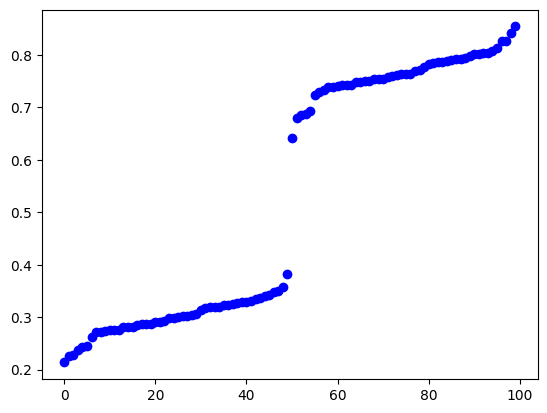

In [ ]:
# А теперь смотрим на график: это же почти график сигмоиды.
# Почему почти? Это тема для отдельных постов.
plt.scatter([x for x in range(0, 100)], Y_pred,  color='blue')
plt.show()

In [ ]:
# Ой, я забыла про b. Ну-ка, принтим.
print(b)
# Странное какое-то. Ну и бог с ним.

-0.062085373258656894
